In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_set.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = training_set.iloc[:, 1:].values
y_train = training_set.iloc[:, 0:1].values
x_test = test_set.iloc[:, :].values

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_train

Using TensorFlow backend.


array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]], dtype=float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [25]:
classifier = Sequential()

classifier.add(Conv2D(32, (5, 5), padding = 'Same', input_shape = (28, 28, 1), activation = 'relu'))
#classifier.add(MaxPool2D(pool_size = (2, 2)))

#classifier.add(Conv2D(32, (5, 5), padding = 'Same', activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(64, (3, 3),padding = 'Same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3),padding = 'Same', activation = 'relu'))
classifier.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
classifier.add(Dropout(0.25))

#classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 10, activation = 'sigmoid'))

In [26]:
classifier.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
datagen.fit(x_train)

In [28]:
track = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size= 128),
                              epochs = 30, steps_per_epoch=x_train.shape[0]//128)

Epoch 1/30
328/328 [==============================] - 119s 362ms/step - loss: 0.5486 - acc: 0.8281
Epoch 2/30
328/328 [==============================] - 117s 356ms/step - loss: 0.1652 - acc: 0.9500
Epoch 3/30
328/328 [==============================] - 114s 349ms/step - loss: 0.1128 - acc: 0.9665
Epoch 4/30
328/328 [==============================] - 120s 365ms/step - loss: 0.0923 - acc: 0.9723
Epoch 5/30
328/328 [==============================] - 114s 348ms/step - loss: 0.0846 - acc: 0.9755
Epoch 6/30
328/328 [==============================] - 117s 358ms/step - loss: 0.0752 - acc: 0.9778
Epoch 7/30
328/328 [==============================] - 117s 358ms/step - loss: 0.0720 - acc: 0.9788
Epoch 8/30
328/328 [==============================] - 116s 355ms/step - loss: 0.0674 - acc: 0.9812
Epoch 9/30
328/328 [==============================] - 115s 351ms/step - loss: 0.0663 - acc: 0.9807
Epoch 10/30
328/328 [==============================] - 110s 335ms/step - loss: 0.0598 - acc: 0.9823
Epoch 11/

In [29]:
track.history.keys()

dict_keys(['loss', 'acc'])

Text(0.5,1,'Model Accuracy')

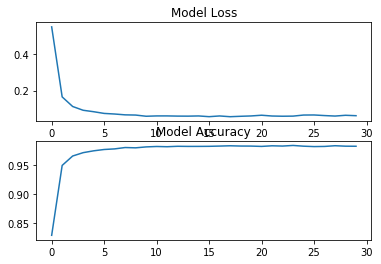

In [30]:
plt.subplot(2, 1, 1)
plt.plot(track.history['loss'])
plt.title("Model Loss")

plt.subplot(2, 1, 2)
plt.plot(track.history['acc'])
plt.title("Model Accuracy")

In [31]:
predict = classifier.predict(x_test)
predict

array([[  2.57538599e-22,   2.13860055e-21,   1.19176070e-06, ...,
          3.01349983e-18,   7.32958917e-17,   5.81007946e-22],
       [  4.12553772e-02,   1.70384037e-11,   3.63805874e-08, ...,
          1.23355604e-09,   8.76498007e-07,   8.44394719e-07],
       [  6.01048783e-24,   1.32041013e-23,   4.60820375e-18, ...,
          4.39607420e-17,   2.63324003e-13,   1.81043947e-06],
       ..., 
       [  2.73239156e-36,   1.41767553e-29,   2.39096420e-22, ...,
          2.10024450e-23,   7.74818777e-22,   3.64664364e-24],
       [  2.17772584e-17,   9.44362249e-20,   1.61774526e-15, ...,
          5.65474696e-13,   1.38682707e-12,   3.47423920e-05],
       [  3.06367733e-33,   9.77665881e-32,   4.26333413e-09, ...,
          6.63105778e-25,   8.68507533e-22,   5.58048884e-30]], dtype=float32)

In [32]:
predict = np.argmax(predict, axis = 1)

In [33]:
predict

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
submit = pd.DataFrame(predict, columns = ['Label'])
submit.reset_index(inplace = True)
submit['index'] = submit['index'] + 1
submit.rename(columns = {'index' : 'ImageId'}, inplace = True)
submit.index = submit['ImageId']
submit = submit.drop('ImageId', axis = 1)

In [35]:
submit.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [36]:
submit.to_csv('digit_submit.csv')

In [37]:
submit.shape

(28000, 1)

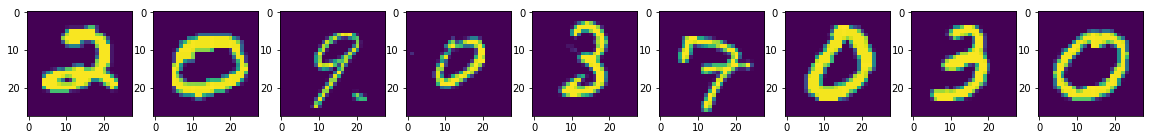

In [38]:
n = 9
plt.figure(figsize = (20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
plt.show()